In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [3]:
dems = pd.read_csv('data/fivethirtyeight/dem_candidates.csv')
reps = pd.read_csv('data/fivethirtyeight/rep_candidates.csv', encoding = 'ISO-8859-1')
dems.columns

Index(['Candidate', 'Gender', 'Race 1', 'Race 2', 'Race 3', 'Incumbent',
       'Incumbent Challenger', 'State', 'Primary Date', 'Office', 'District',
       'Primary Votes', 'Primary %', 'Primary Outcome', 'Runoff Votes',
       'Runoff %', 'Runoff Outcome', 'EMILY's List', 'Justice Dems',
       'Indivisible', 'PCCC', 'Our Revolution', 'Sunrise', 'Sanders', 'AOC',
       'Party Committee'],
      dtype='object')

In [4]:
dems['District'] = dems['District'].replace('At-Large', '1')
reps['District'] = reps['District'].replace('At-Large', '1')

In [21]:
dems['Fullname'].value_counts()
reps['Fullname'].value_counts()

Oklahoma2         14
Virginia10        11
Texas8            11
New Hampshire1    10
Texas35           10
                  ..
Illinois9          1
Illinois10         1
Illinois12         1
Oklahoma1          1
Rhode Island2      1
Name: Fullname, Length: 423, dtype: int64

In [22]:
districts = pd.read_csv('data/districts.csv')

districts

def make_list(row):
    return [row.State + str(i) for i in np.arange(1, row['# Districts'] + 1)]

nested = districts.apply(make_list, axis=1)
sum(nested, [])

['Alabama1',
 'Alabama2',
 'Alabama3',
 'Alabama4',
 'Alabama5',
 'Alabama6',
 'Alabama7',
 'Alaska1',
 'Arizona1',
 'Arizona2',
 'Arizona3',
 'Arizona4',
 'Arizona5',
 'Arizona6',
 'Arizona7',
 'Arizona8',
 'Arizona9',
 'Arkansas1',
 'Arkansas2',
 'Arkansas3',
 'Arkansas4',
 'California1',
 'California2',
 'California3',
 'California4',
 'California5',
 'California6',
 'California7',
 'California8',
 'California9',
 'California10',
 'California11',
 'California12',
 'California13',
 'California14',
 'California15',
 'California16',
 'California17',
 'California18',
 'California19',
 'California20',
 'California21',
 'California22',
 'California23',
 'California24',
 'California25',
 'California26',
 'California27',
 'California28',
 'California29',
 'California30',
 'California31',
 'California32',
 'California33',
 'California34',
 'California35',
 'California36',
 'California37',
 'California38',
 'California39',
 'California40',
 'California41',
 'California42',
 'California43',
 '

In [15]:
dems['IncumbentBin'] = dems['Incumbent'].map({'No': 0, 'Yes': 1})
reps['IncumbentBin'] = reps['Incumbent'].map({'No': 0, 'Yes': 1})
dems['Fullname'] = dems['State'] + dems['District']
reps['Fullname'] = reps['State'] + reps['District']

demincdists = dems[dems['Incumbent'] == 'Yes']['Fullname'].unique()
demchadists = dems[dems['Incumbent'] == 'No']['Fullname'].unique()

repincdists = reps[reps['Incumbent'] == 'Yes']['Fullname'].unique()
repchadists = reps[reps['Incumbent'] == 'No']['Fullname'].unique()

demincs = dems[dems['Fullname'].isin(demincdists)]
demchas = dems[dems['Fullname'].isin(demchadists)]

repincs = reps[reps['Fullname'].isin(repincdists)]
repchas = reps[reps['Fullname'].isin(repchadists)]

deminccounts = demincs[['Fullname', 'Candidate']].groupby('Fullname').count()
demchacounts = demchas[['Fullname', 'Candidate']].groupby('Fullname').count()
deminccounts['Type'] = 'Incumbent'
demchacounts['Type'] = 'Non-incumbent'

demalls = pd.concat([deminccounts, demchacounts]).reset_index()
demalls['Party'] = 'Democratic'

repinccounts = repincs[['Fullname', 'Candidate']].groupby('Fullname').count()
repchacounts = repchas[['Fullname', 'Candidate']].groupby('Fullname').count()
repinccounts['Type'] = 'Incumbent'
repchacounts['Type'] = 'Non-incumbent'

repalls = pd.concat([repinccounts, repchacounts]).reset_index()
repalls['Party'] = 'Republican'

alls = pd.concat([demalls, repalls])
alls = alls.reset_index()
alls

incs = alls[alls['Type'] == 'Incumbent']
chas = alls[alls['Type'] == 'Non-incumbent']

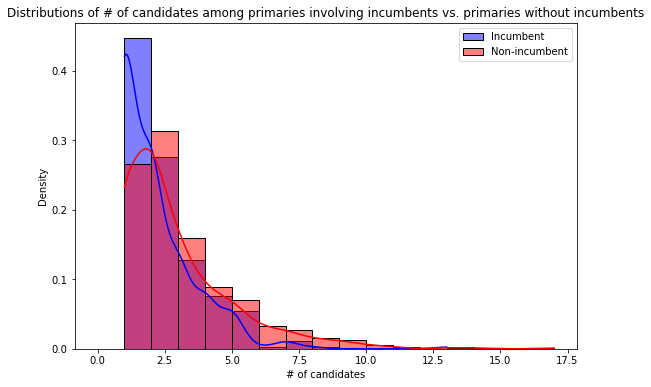

In [17]:
bins = np.arange(0, 18)
plt.figure(figsize=[9, 6])
sns.histplot(incs, x='Candidate', stat='density', bins=bins, palette='tab10', alpha=0.5, kde=True, color='blue', label='Incumbent')
sns.histplot(chas, x='Candidate', stat='density', bins=bins, palette='tab10', alpha=0.5, kde=True, color='red', label='Non-incumbent')
plt.legend()
plt.title('Distributions of # of candidates among primaries involving incumbents vs. primaries without incumbents')
plt.xlabel('# of candidates');

In [58]:
allcounts

,Fullname,Candidate,Type
0,Alabama1,1,Incumbent
1,Alabama2,3,Incumbent
2,Alabama3,3,Incumbent
3,Alabama4,3,Incumbent
4,Alabama6,1,Incumbent
...,...,...,...
777,Wisconsin5,2,Challenger
778,Wisconsin6,2,Challenger
779,Wisconsin7,3,Challenger
780,Wisconsin8,2,Challenger
